# Python with Investor Exchange API, Pandas & Matplotlib
This workshop is an adaptation of the posts by Gerogios Efstathopoulos and can be found here: https://www.learndatasci.com/tutorials/python-finance-part-yahoo-finance-api-pandas-matplotlib/

### Setting up Investor Exchange Account
Investors Exchange (IEX) at https://iexcloud.io/ offers a free web-based API to access financial data such as historical and current stock ticker information. You will need to setup an account (which requires an email validation) in order to obtain an API Key which we will use in our Python code. 

### Python Requirements
You will need to have installed the following Python packages (which you should probably already have):
* pandas
* pandas-datareader (this one does not come pre-installed with Anaconda)
* matplotlib

### Introduction to Pandas

https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html

### Introduction to Matplotlib

https://matplotlib.org/3.1.1/tutorials/introductory/pyplot.html

## Analyzing stock ticker data
First, import the following packages:

In [2]:
from pandas import Series, DataFrame
from pandas_datareader import data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

Then we will set our IEX API KEY to the environment variable "IEX_API_KEY". **Note - you usually don't do this in your front end code**

In [3]:
os.environ["IEX_API_KEY"] = "pk_45b14986dc844348a4f4d6bbd54d4871"

Now, let's create a small list of tickers that we want to analyze. We can scale up with more stocks but we will start with just 3 for now. Let's also look at data for since the beginning of 2018. 

In [4]:
tickers = ['AAPL', 'AMZN', 'MSFT']

start_date = '2018-01-01'
end_date = '2019-11-01'

Now pull in the ticker data with pandas's `datareader` with:

In [5]:
stock_data = data.DataReader(tickers, 'iex', start_date, end_date)

In [7]:
stock_data

Attributes    open                     high                      low           \
Symbols       AAPL     AMZN    MSFT    AAPL     AMZN    MSFT    AAPL     AMZN   
date                                                                            
2018-01-02  170.16  1172.00   86.13  172.30  1190.00   86.31  169.26  1170.51   
2018-01-03  172.53  1188.30   86.06  174.55  1205.49   86.51  171.96  1188.30   
2018-01-04  172.54  1205.00   86.59  173.47  1215.87   87.66  172.08  1204.66   
2018-01-05  173.44  1217.51   87.66  175.37  1229.14   88.41  173.05  1210.00   
2018-01-08  174.35  1236.00   88.20  175.61  1253.08   88.58  173.93  1232.03   
...            ...      ...     ...     ...      ...     ...     ...      ...   
2019-10-28  247.42  1748.06  144.40  249.25  1778.70  145.67  246.72  1742.50   
2019-10-29  248.97  1774.81  144.08  249.75  1777.00  144.50  242.57  1755.81   
2019-10-30  244.76  1760.24  143.52  245.30  1782.38  145.00  241.21  1759.12   
2019-10-31  247.24  1775.99  144.90  249.17  1792.00  144.93  237.26  1771.48   
2019-11-01  249.54  1788.01  144.26  255.93  1797.45  144.42  249.16  1785.21   

Attributes           close                     volume                     
Symbols       MSFT    AAPL     AMZN    MSFT      AAPL     AMZN      MSFT  
date                                                                      
2018-01-02   85.50  172.26  1189.01   85.95  25555934  2694494  22483797  
2018-01-03   85.97  172.23  1204.20   86.35  29517899  3108793  26061439  
2018-01-04   86.57  173.03  1209.59   87.11  22434597  3022089  21911974  
2018-01-05   87.43  175.00  1229.14   88.19  23660018  3544743  23407110  
2018-01-08   87.60  174.35  1246.87   88.28  20567766  4279475  22113049  
...            ...     ...      ...     ...       ...      ...       ...  
2019-10-28  143.51  249.05  1777.08  144.19  24143241  3708851  35280137  
2019-10-29  142.65  243.29  1762.71  142.83  35709867  2276855  20589469  
2019-10-30  142.79  243.26  1779.99  144.61  31130522  2449405  18496591  
2019-10-31  142.99  248.76  1776.66  143.37  34790520  2781185  24605135  
2019-11-01  142.97  255.82  1791.44  143.72  37781334  2790354  33128366  

[463 rows x 15 columns]

In [9]:
type(stock_data)

pandas.core.frame.DataFrame

We see that the data retrieved from IEX is a DataFrame.
We see we have daily information of the `open`, `high`, `low`, `close`, and `volume` of our selected tickers in each row. 

The index of each row is the date which you can access using the `loc` method:

In [14]:
stock_data.loc['2018-01-02']

Attributes  Symbols
open        AAPL            170.16
            AMZN           1172.00
            MSFT             86.13
high        AAPL            172.30
            AMZN           1190.00
            MSFT             86.31
low         AAPL            169.26
            AMZN           1170.51
            MSFT             85.50
close       AAPL            172.26
            AMZN           1189.01
            MSFT             85.95
volume      AAPL       25555934.00
            AMZN        2694494.00
            MSFT       22483797.00
Name: 2018-01-02, dtype: float64

### Plot stock data
Let's plot only the stock price at **close** for each of our 3 tickers. We will use Python's powerful `matplotlib` library for creating subplots. For more details, see https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplots.html#matplotlib.pyplot.subplots

First, create the `close_data` object:

In [16]:
close_data = stock_data['close']

In [18]:
close_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Symbols,,,,,,,,
AAPL,463.0,192.508164,22.133883,142.19,174.80,190.58,208.810,255.82
AMZN,463.0,1710.052311,179.074380,1189.01,1592.90,1734.78,1842.990,2039.51
MSFT,463.0,112.656242,16.366198,85.01,100.26,108.50,127.015,144.61


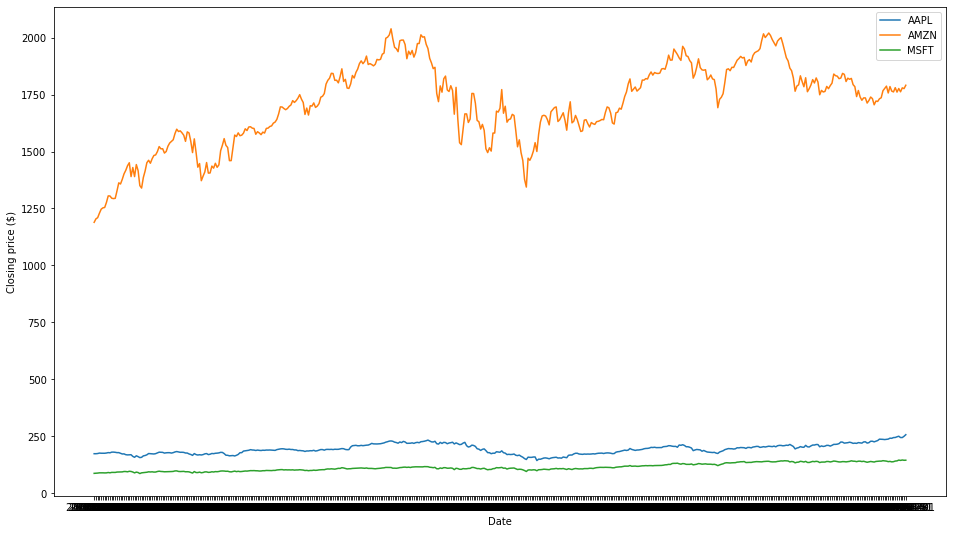

In [23]:
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(close_data.index, close_data['AAPL'], label='AAPL')
ax.plot(close_data.index, close_data['AMZN'], label='AMZN')
ax.plot(close_data.index, close_data['MSFT'], label='MSFT')
ax.set_xlabel('Date')
ax.set_ylabel('Closing price ($)')
ax.legend()
plt.show()

### Moving averages

Another valuable series to look at is the simple moving average of the stock time-series data over a short and long window. The moving average is just the rolling price average of the past X days and pandas has a built-in `rolling()` function. For a short window, we will use 20 days and for a long window, 100 days. 

Note: creating a moving average means that for a window of $X$ units, the **first $X-1$** units are not valid. For example, if $X = 20\ days$, the data of the first 19 days is used to calculated the average for day 20. Day 21 is calculated using the prices from Day 2 to Day 21. We will look at *Exponential Moving Averages* later which address this latency.

The reason for introducing the concept of moving averages is that there are trading strategies based on the behaviour of moving averages of differet windows. 

We will do this first for just one of the tickers. Let us use `AMZN`:

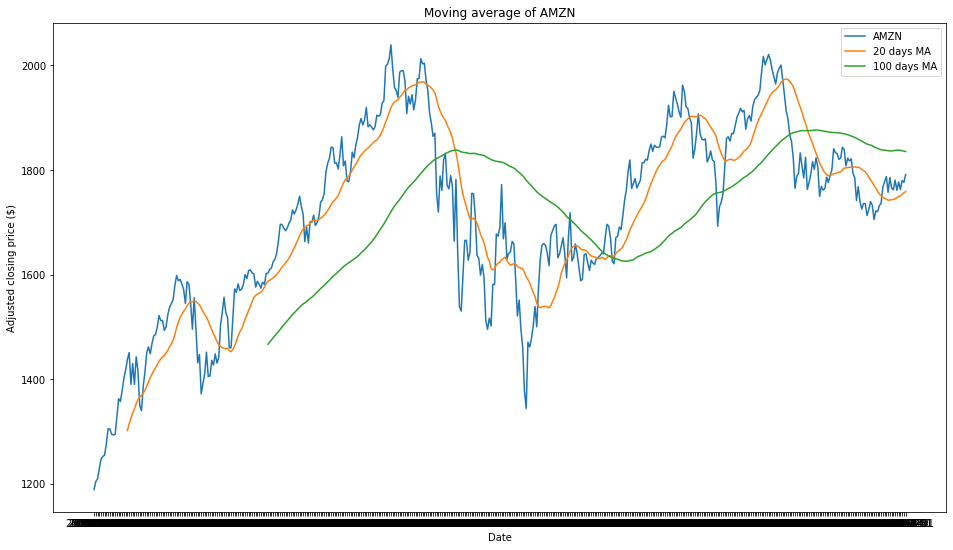

In [25]:
amzn_data = close_data['AMZN']

short_rolling_amzn = amzn_data.rolling(window=20).mean()
long_rolling_amzn = amzn_data.rolling(window=100).mean()

fig, ax = plt.subplots(figsize=(16,9))
ax.plot(amzn_data.index, amzn_data, label='AMZN')
ax.plot(short_rolling_amzn.index, short_rolling_amzn, label='20 days MA')
ax.plot(long_rolling_amzn.index, long_rolling_amzn, label='100 days MA')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.set_title('Moving average of AMZN')
ax.legend()
plt.show()

* If you had to create a simple trading strategy based on the moving averages, when would you buy and when would you sell?

* Calculate and plot the 50 day and 200 day moving averages which are commonly used. For an interesting read on which moving average lines are popular and why, check out: https://www.investopedia.com/ask/answers/122414/what-are-most-common-periods-used-creating-moving-average-ma-lines.asp

Next, we will take a look at a few simple but realistic quantitative trading strategies using Python pandas and the methods discussed above.

## Quantatitive Trading Strategies

In the last session, we looked at a basic trading strategy where we plot a series of moving averages, such as the 100 day and 20 day moving averages, and then compare where they intersect. We will expand on this approach and use pandas to calculate the return of our strategies. 

Just looking at the price information has some drawbacks. The price of a stock is only positive and so it gets messy if we use models and approaches which require or use negative numbers. Also, looking at price numbers over a long period of time results in statistical properties which are less stable. For example, note the huge standard deviations in the following:

In [27]:
close_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Symbols,,,,,,,,
AAPL,463.0,192.508164,22.133883,142.19,174.80,190.58,208.810,255.82
AMZN,463.0,1710.052311,179.074380,1189.01,1592.90,1734.78,1842.990,2039.51
MSFT,463.0,112.656242,16.366198,85.01,100.26,108.50,127.015,144.61


An alternative approach is to look at the timeseries of the changes or delta in the price vs. the timeseries of the price itself. The most common timeseries used are:

We have the **relative return**:
> $relative \_return(t) = \frac{p(t) - p(t-1)} {p(t-1)}$

which is simply the return between an incremental period of time such as a day.

And we have the **log-return**:
> $log \_return(t) = log(\frac{p(t)} {p(t-1)})$

Why do we use the log-return timeseries?

1. *Log-returns* are **additive** and this makes it easy to sum up time-series data:

    >  $r(t_1) + r(t_2) = log(\frac {p(t_1)} {p(t_0)}) + log(\frac {p(t_2)} {p(t_1)}) = log(\frac {p(t_2)} {p(t_0)}) $

    However *relative returns* are not additive. But most people understand relative returns.

    > $r(t_1) + r(t_2) = \frac{p(t_1) - p(t_0)} {p(t_0)} + \frac{p(t_2) - p(t_1)} {p(t_1)} \not = \frac{p(t_2) - p(t_0)} {p(t_0)}$ 

2. *Log-returns* **approximately equal** *relative returns* for values of $\frac {p(t)} {p(t-1)}$ close to 1.

These can both be calculated easily with pandas:

In [28]:
relative_returns = close_data.pct_change(1)
relative_returns.head()

Symbols,AAPL,AMZN,MSFT
date,,,
2018-01-02,NaN,NaN,NaN
2018-01-03,-0.000174,0.012775,0.004654
2018-01-04,0.004645,0.004476,0.008801
2018-01-05,0.011385,0.016163,0.012398
2018-01-08,-0.003714,0.014425,0.001021


In [29]:
log_returns = np.log(close_data).diff()
log_returns.head()

Symbols,AAPL,AMZN,MSFT
date,,,
2018-01-02,NaN,NaN,NaN
2018-01-03,-0.000174,0.012694,0.004643
2018-01-04,0.004634,0.004466,0.008763
2018-01-05,0.011321,0.016033,0.012322
2018-01-08,-0.003721,0.014322,0.001020


Now if we want to sum the returns over a period of time, we need to use the *log_returns* and then convert the sum of the log_returns to the relative_returns. We can do this with:

The cumulative log_returns are:

$c_{log}(t) = \Sigma_{k=1}^t r(t)$ 

And converting between the cumulative log-return and relative-return is simply:

$c_{relative}(t) = e^{c_{log}(t)} - 1$

With pandas, the cumulative sum is calculated by using the `cumsum()` method: 

In [33]:
cumulative_log_returns = log_returns.cumsum()
cumulative_log_returns.tail()

Symbols,AAPL,AMZN,MSFT
date,,,
2019-10-28,0.368649,0.401851,0.517366
2019-10-29,0.345249,0.393731,0.507889
2019-10-30,0.345126,0.403487,0.520275
2019-10-31,0.367484,0.401614,0.511663
2019-11-01,0.395469,0.409899,0.514101


In [35]:
cumulative_relative_returns = np.exp(cumulative_log_returns) - 1
cumulative_relative_returns.tail()

Symbols,AAPL,AMZN,MSFT
date,,,
2019-10-28,0.445780,0.494588,0.677603
2019-10-29,0.412342,0.482502,0.661780
2019-10-30,0.412168,0.497035,0.682490
2019-10-31,0.444096,0.494235,0.668063
2019-11-01,0.485081,0.506665,0.672135


Let us now plot the cumulative log and relative returns for our tickers:

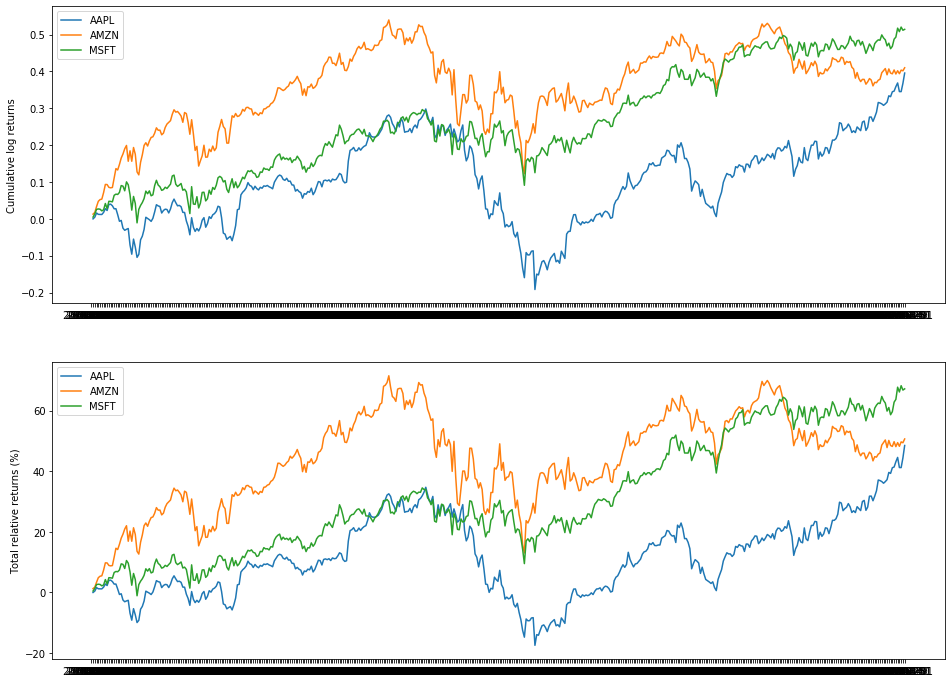

In [36]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,12))

for c in cumulative_log_returns:
    ax1.plot(cumulative_log_returns[c].index, cumulative_log_returns[c], label=str(c))

ax1.set_ylabel('Cumulative log returns')
ax1.legend(loc='best')

for c in cumulative_relative_returns:
    ax2.plot(cumulative_relative_returns[c].index, 100*(cumulative_relative_returns[c]), label=str(c))

ax2.set_ylabel('Total relative returns (%)')
ax2.legend(loc='best')
plt.show()

Great! Now we have the ability to dissect any stock price ticker into its daily/unit returns and then calculate the **cumulative** return over a defined time period!

## Defining a Trading Strategy
In defining a trading strategy, we want to derive a set of weights which we will apply to different assets in our portfolio and compare returns over a period of time. So given a certain amount of dollars $N$ we want to figure out $w_1(t)$ and $w_2(t)$ where the sum of those two is less than or equal to 1. 

For example, assume we can invest in 2 instruments only and that $N=\$1000$. If at some point $w_1(t)=0.4$ and $w_2(t)=0.6$, this means that we have invested $w_1(t)N=\$400$ in asset 1 and $w_2(t)N=\$600$ in asset 2. 

Note - We won't go into short selling here but you can also have negative weights representing **short positions**. 

### Equal Weights Strategy
Let us look at how to calculate the return of our trading strategy for using **equal weights**.

First, let us look at just a single day, the last day, of our *log_returns* timeseries:

In [38]:
last_day = log_returns.tail(1)
last_day

Symbols,AAPL,AMZN,MSFT
date,,,
2019-11-01,0.027985,0.008285,0.002438


Then let us create equal weights for all 3 stocks (i.e. a weighting of $1/3$) using the same index and columns as our `last_day` vector:

In [39]:
weights_vector = pd.DataFrame([[1/3, 1/3, 1/3]], index=last_day.index, columns=last_day.columns)
weights_vector

Symbols,AAPL,AMZN,MSFT
date,,,
2019-11-01,0.333333,0.333333,0.333333


So what we want to do is multiply the weight of each stock times the return for that stock to determine how much we would actually get for a single day. In order to do this multiplication we simply do:

In [40]:
weights_vector*last_day

Symbols,AAPL,AMZN,MSFT
date,,,
2019-11-01,0.009328,0.002762,0.000813


And if we want the sum across all stocks, just sum up all the columns (pass the `axis=1` parameter in the `sum()` function - see https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sum.html)

In [41]:
(weights_vector*last_day).sum(axis=1)

date
2019-11-01    0.012903
dtype: float64

So this is the portfolio return on a single day, from the previous day, using our $1/3$ weighting strategy for the 3 specific stocks we have picked. 

Now, let us do this for the entire period between our start and end dates:

In [44]:
equal_weights = pd.DataFrame([[1/3,1/3,1/3]], index=log_returns.index, columns=log_returns.columns)
equal_strategy_log_returns = (equal_weights*log_returns).sum(axis=1)
equal_strategy_log_returns.tail()

date
2019-10-28    0.014386
2019-10-29   -0.013665
2019-10-30    0.007339
2019-10-31    0.003958
2019-11-01    0.012903
dtype: float64

And then calculate the cumulative return for the entire timeseris:

In [46]:
cumulative_equal_log_returns = equal_strategy_log_returns.cumsum()
cumulative_equal_relative_returns = np.exp(cumulative_equal_log_returns)-1
cumulative_equal_relative_returns.tail()

date
2019-10-28    0.536164
2019-10-29    0.515315
2019-10-30    0.526477
2019-10-31    0.532530
2019-11-01    0.552432
dtype: float64

### Equal vs. Custom Weights Strategy
Let us look at how to calculate the return of our trading strategy for using custom weights and then plot and compare the two. Let's say we are friends with Jeff Bezos so we invested more with AMZN:

In [49]:
custom_weights = pd.DataFrame([[1/5,3/5,1/5]], index=log_returns.index, columns=log_returns.columns)
custom_strategy_log_returns =(custom_weights*log_returns).sum(axis=1)

cumulative_custom_log_returns = custom_strategy_log_returns.cumsum()
cumulative_custom_relative_returns = np.exp(cumulative_custom_log_returns)-1
cumulative_custom_relative_returns.tail()

date
2019-10-28    0.519397
2019-10-29    0.502104
2019-10-30    0.514631
2019-10-31    0.517096
2019-11-01    0.533961
dtype: float64

Let us now plot the two relative_returns series to compare performance:

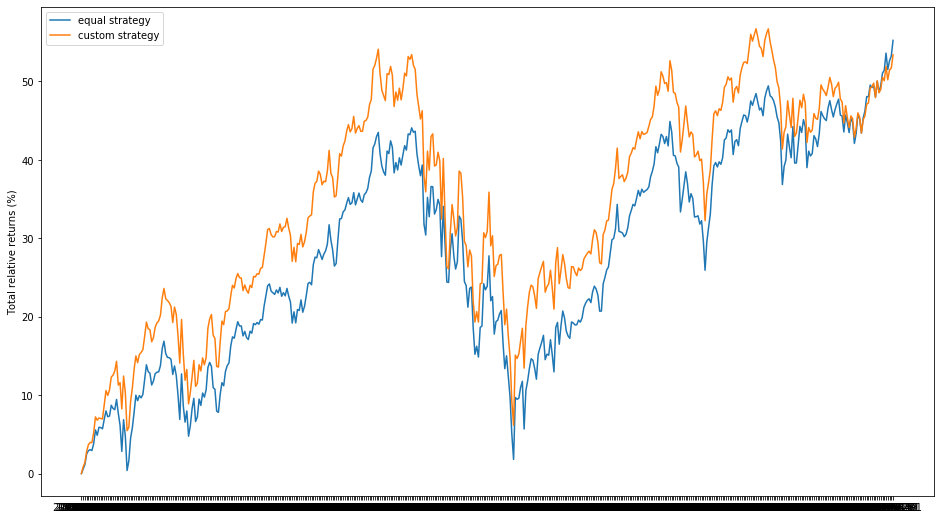

In [50]:
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(cumulative_equal_relative_returns.index, 100*cumulative_equal_relative_returns, label='equal strategy')
ax.plot(cumulative_custom_relative_returns.index, 100*cumulative_custom_relative_returns, label='custom strategy')
ax.set_ylabel('Total relative returns (%)')
ax.legend(loc='best')
plt.show()

So we see that over the course of our selected time period, the custom (AMZN heavy) strategy tends to perform better but as of late, the relative returns are nearly identical.

Let us write a quick function to calculate and print out some basic yearly statistics:

In [51]:
def print_portfolio_yearly_statistics(portfolio_cumulative_relative_returns, days_per_year = 52 * 5):

    total_days_in_simulation = portfolio_cumulative_relative_returns.shape[0]
    number_of_years = total_days_in_simulation / days_per_year

    # The last data point will give us the total portfolio return
    total_portfolio_return = portfolio_cumulative_relative_returns[-1]
    
    # Average portfolio return assuming compunding of returns
    average_yearly_return = (1 + total_portfolio_return)**(1/number_of_years) - 1

    print('Total portfolio return is: ' + '{:5.2f}'.format(100*total_portfolio_return) + '%')
    print('Average yearly return is: ' + '{:5.2f}'.format(100*average_yearly_return) + '%')

First our equal weights strategy statistics:

In [52]:
print_portfolio_yearly_statistics(cumulative_equal_relative_returns)

Total portfolio return is: 55.24%
Average yearly return is: 28.02%


In [53]:
print_portfolio_yearly_statistics(cumulative_custom_relative_returns)

Total portfolio return is: 53.40%
Average yearly return is: 27.16%


### Exercise

You have the following 5 ETF stock tickers for their corresponding sectors:
* IAU - Gold Trust
* IXC - Global Energy
* IXG - Global Financials
* IXJ - Global Healthcare
* IXN - Global Tech

Come up with best weightings using at least 2 of these 5 ETFs which produce the greatest average yearly returns.


## Trading Strategy using Moving Averages

One of the oldest and simplest trading strategies that exist is the one that uses a moving average of the price (or returns) timeseries to proxy the recent trend of the price. This helps remove the daily price 'noise' and allows us to observe the longer-term behaviour of the asset. 

Earlier, we created short-term and long-term moving averages for just the AMZN ticker:



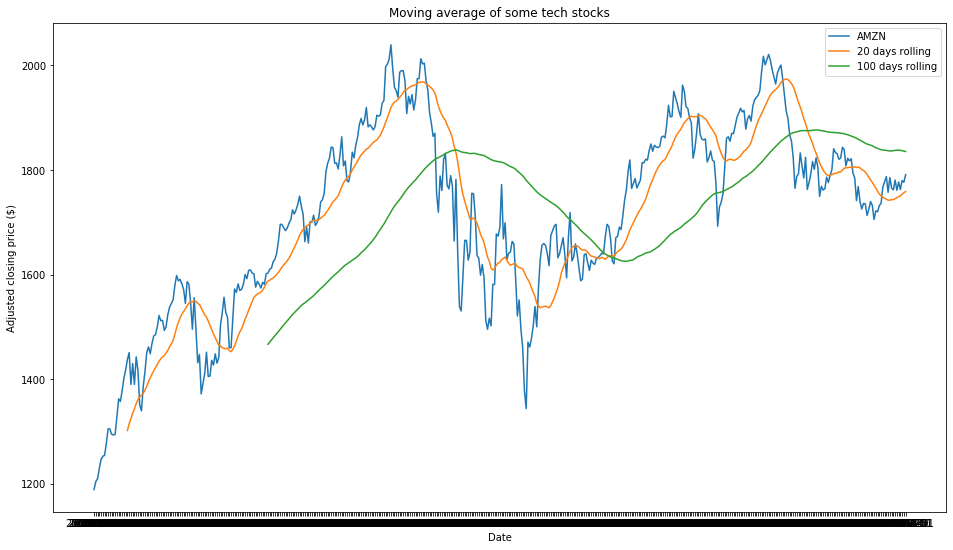

In [54]:
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(amzn_data.index, amzn_data, label='AMZN')
ax.plot(short_rolling_amzn.index, short_rolling_amzn, label='20 days rolling')
ax.plot(long_rolling_amzn.index, long_rolling_amzn, label='100 days rolling')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.set_title('Moving average of some tech stocks')
ax.legend()
plt.show()

The Simple Moving Average (SMA) timeseries, as plotted above, are less noisy but lag the original price timeseries, which means changes in the trend are only seen with a delay (or lag) of some number of days - let's call this $L$. For a moving average calculated using $M$ days, the lag $L$ is roughly $\frac M 2$. 

So if we are using a 100 days SMA, this means we may be late by almost 50 days, which can significantly affect our strategy.

One way to reduce the lag induced by the use of the SMA is to use the so-called **Exponential Moving Average (EMA)**, defined as:

>$ EMA(t) = (1-\alpha)EMA(t-1) + \alpha p(t)$

with a starting condition:

>$EMA(t_0) = p(t_0)$

where $p(t)$ is the price at time $t$ and $\alpha$ is called the *decay parameter* for the $EMA$. 

$\alpha$ is related to the window $M$ as:

>$ \alpha = \frac 2 {M+1}$

So as $M$ gets larger, $\alpha$ gets smaller. The reason why EMA reduces the lag is that it puts more weight on more recent observations, whereas the SMA weights all observations equally by $\frac 1 M$.

So take $M_1$ = 20 days, $M_2$ = 100 days, $t_0$ = yesterday and $t_1$ = today. 

With $M_1$ = 20 days:

> $EMA(t_1) = 0.905EMA(t_0) + 0.095p(t_1)$


With $M_1$ = 100 days:

> $EMA(t_1) = 0.98EMA(t_0) + 0.02p(t_1)$

The weighting given to the most recent price $p(t_1)$ is greater for a shorter-period EMA ($0.095$) than for a longer-period EMA ($0.02$) and both weightings are higher than what the SMA would have used:

$M_1$ = 20 days:

EMA weighting on $p(t_1)$: $0.095$
SMA weighting on $p(t_1)$: $0.05$

$M_1$ = 100 days:

EMA weighting on $p(t_1)$: $0.02$
SMA weighting on $p(t_1)$: $0.01$

Using Pandas, calculating the exponential moving average is easy. Let's compare the 20 day SMA vs EMA:

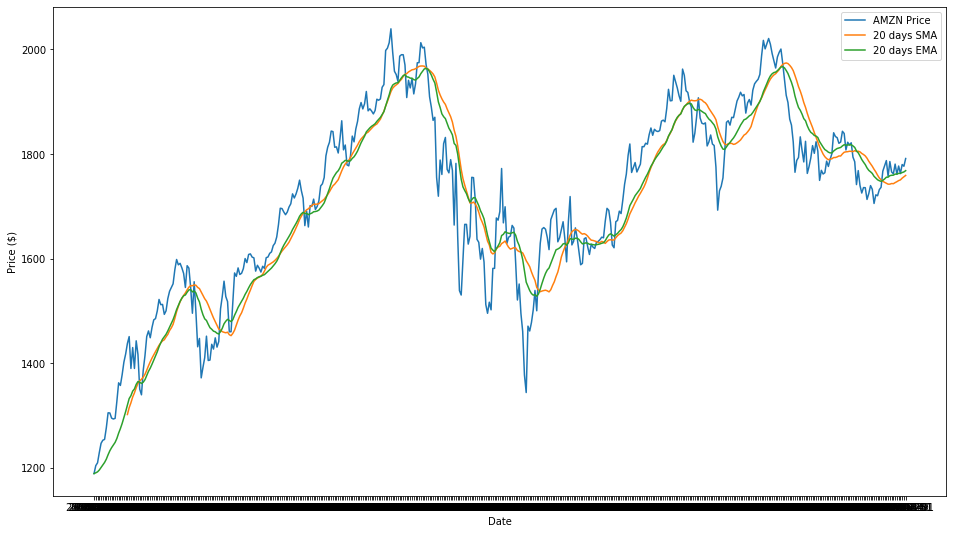

In [56]:
# Calculate the EMA using the .ewm() method:
ema_amzn_short = amzn_data.ewm(span=20, adjust=False).mean()

# Plot EMA and SMA
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(amzn_data.index, amzn_data, label='AMZN Price')
ax.plot(short_rolling_amzn.index, short_rolling_amzn, label='20 days SMA')
ax.plot(ema_amzn_short.index, ema_amzn_short, label='20 days EMA')

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.legend()
plt.show()

Note the EMA curve smooths out the price fluctuations just like the SMA curve, but is more responsive to price trend changes and **does not have a 20 day lag!**

### MA Strategy Implementation

Here, we are going to take advantage of the fact that a moving average timeseries (whether SMA or EMA) lags the actual price behaviour. Our strategy will be to use the crossing of the moving average an actual price timeseries as potential trading signals:

1. When the price timeseries $p(t)$ crosses the EMA timeseries $e(t)$ from below, we will buy (go long) one unit of the asset.

2. When the price timeseries $p(t)$ crosses the EMA timeseries $e(t)$ from above, we will sell one unit of the asset.

Like the last exercise, we will assume our funds are equally split across all 3 assets with a weighting of $w_i(t) = \frac 1 3$ when we are holding the asset and a weighting of $w_i(t) = 0$ when we have sold the asset.

*Advanced - if you are familiar with the concept of short selling, you can use a weighting of $w_i(t) = -\frac 1 3$ in your strategy.*

So to implement the above strategy in Python using Pandas, we simply take the *sign** of the difference between the price $p_i(t)$ and the EMA $e_i(t)$:

In [60]:
ema_short = close_data.ewm(span=20, adjust=False).mean()

trading_positions_raw = close_data - ema_short

trading_positions_raw[trading_positions_raw <= 0] = 0

trading_positions = trading_positions_raw.apply(np.sign)*1/3

trading_positions.head()

Symbols,AAPL,AMZN,MSFT
date,,,
2018-01-02,0.000000,0.000000,0.000000
2018-01-03,0.000000,0.333333,0.333333
2018-01-04,0.333333,0.333333,0.333333
2018-01-05,0.333333,0.333333,0.333333
2018-01-08,0.333333,0.333333,0.333333


where $0$ represents days we are not holding the particular stock, and the $0.33..$ represents days we are holding the particular stock.

Now note that because we are using the **closing stock price** in our analysis, determining whether we are holding a stock or not impacts our action on the **following day**. So our position on $t_0$ is determined by the closing price on day $t_0 - 1$. So this means we need to **lag our trading signals by one day:**

In [61]:
trading_positions_final = trading_positions.shift(1)

And as before, we use the `log_returns` data to then calculate the overall portfolio relative return using our moving average strategy:

In [66]:
ema_strategy_log_returns = (trading_positions_final * log_returns).sum(axis=1)

cumulative_ema_strategy_log_returns = ema_strategy_log_returns.cumsum()
cumulative_ema_strategy_relative_returns = np.exp(cumulative_ema_strategy_log_returns) - 1

And as before, let us plot the cumulative returns and compare with our simple *buy-and-hold* strategy regardless of price trends:

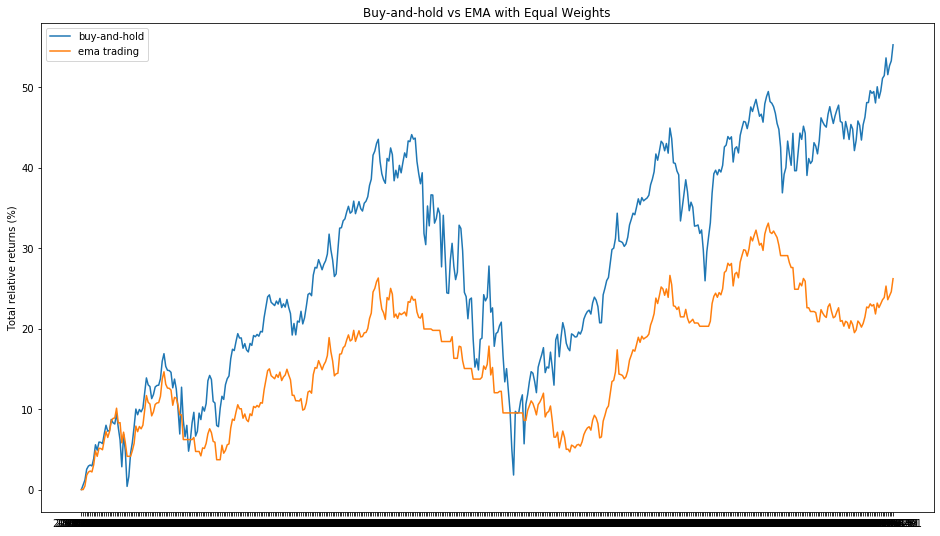

In [67]:
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(cumulative_equal_relative_returns.index, 100*cumulative_equal_relative_returns, label='buy-and-hold')
ax.plot(cumulative_ema_strategy_relative_returns.index, 100*cumulative_ema_strategy_relative_returns, label='ema trading')
ax.set_ylabel('Total relative returns (%)')
ax.legend(loc='best')
ax.set_title('Buy-and-hold vs EMA with Equal Weights')
plt.show()

Looks like buy-and-hold is the clear winner in this timeframe! Let's calcualte the portfolio and average yearly returns:

In [68]:
print_portfolio_yearly_statistics(cumulative_ema_strategy_relative_returns)

Total portfolio return is: 26.19%
Average yearly return is: 13.96%


Compared with:

In [69]:
print_portfolio_yearly_statistics(cumulative_equal_relative_returns)

Total portfolio return is: 55.24%
Average yearly return is: 28.02%


* How do these returns compare if we look at a longer timeframe, say since 2015? (Note - IEX limits data timeframes to 5 years with the free account)